In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

from scipy.stats.mstats import winsorize

warnings.filterwarnings("ignore")

In [2]:
states=pd.read_excel("C:/Users/Gunesim/Desktop/Ödevler/states_full.xls", encoding="utf8")

1NCİ SORU:

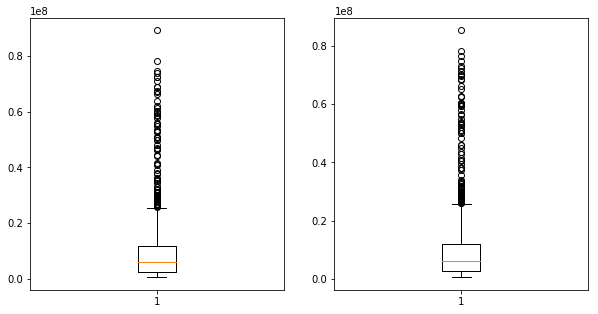

In [3]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(states["TOTAL_REVENUE"])

plt.subplot(1,2,2)
plt.boxplot(states["TOTAL_EXPENDITURE"])

plt.show()

Kutu grafiğine baktığımızda veri setimizde uç değerler olduğunu görüyoruz. Bu durumda, TUKEY Yöntemi ile uç değerlerin miktarlarına bakalım.

In [4]:
def tukey(veri_listesi):
    q75, q25 = np.percentile(veri_listesi, [75 ,25])
    caa = q75 - q25
    
    esik_degerler=pd.DataFrame()
    
    for esik_degeri in np.arange(1,5.5,0.5):
        min_deger = q25 - (caa*esik_degeri)
        maks_deger = q75 + (caa*esik_degeri)
    
        aykiri_deger_sayisi = len((np.where((veri_listesi > maks_deger)| 
                                       (veri_listesi < min_deger))[0]))
    
        esik_degerler = esik_degerler.append({'Eşik Değeri': esik_degeri,'Aykırı Değer Sayısı': aykiri_deger_sayisi,
                                           }, ignore_index=True)
    
    return esik_degerler

In [5]:
tukey(states["TOTAL_REVENUE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,134.0,1.0
1,97.0,1.5
2,61.0,2.0
3,49.0,2.5
4,43.0,3.0
5,39.0,3.5
6,33.0,4.0
7,27.0,4.5
8,21.0,5.0


In [6]:
tukey(states["TOTAL_EXPENDITURE"])

,Aykırı Değer Sayısı,Eşik Değeri
0,134.0,1.0
1,98.0,1.5
2,61.0,2.0
3,50.0,2.5
4,44.0,3.0
5,39.0,3.5
6,35.0,4.0
7,27.0,4.5
8,22.0,5.0


2NCİ SORU:

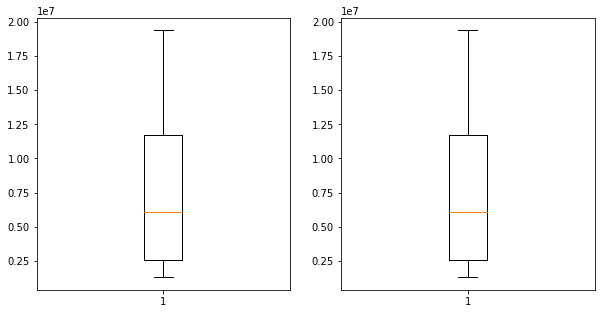

In [7]:
wins_TOTAL_REVENUE=winsorize(states["TOTAL_REVENUE"], (0.1, 0.1))
wins_TOTAL_EXPENDITURE=winsorize(states["TOTAL_REVENUE"], (0.1, 0.1))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot(wins_TOTAL_REVENUE)

plt.subplot(1,2,2)
plt.boxplot(wins_TOTAL_EXPENDITURE)

plt.show()

Veri setimizde çok fazla aykiri değer olduğu için bunları çıkarmamız doğru olmaz. Ayrıca, verileri dönüştürdüğümüzde (karekök veya log dönüşümü) veriler tamamen kaybolmak yerine azalacağı için ve bizden istenen de tamamının yok edilmesi olduğuna göre winsorize metodunu kullandık.

In [8]:
tukey(wins_TOTAL_REVENUE)

,Aykırı Değer Sayısı,Eşik Değeri
0,0.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


In [9]:
tukey(tukey(wins_TOTAL_EXPENDITURE))

,Aykırı Değer Sayısı,Eşik Değeri
0,0.0,1.0
1,0.0,1.5
2,0.0,2.0
3,0.0,2.5
4,0.0,3.0
5,0.0,3.5
6,0.0,4.0
7,0.0,4.5
8,0.0,5.0


Yukarıdaki tablolarda görüldüğü üzere aykırı değer kalmadı.

3NCÜ SORU:

In [10]:
states["BUDGET_DEFICIT"]=states["TOTAL_REVENUE"]-states["TOTAL_EXPENDITURE"]

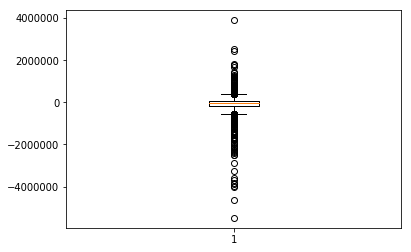

In [11]:
plt.boxplot(states["BUDGET_DEFICIT"])
plt.show()

In [12]:
tukey(states["BUDGET_DEFICIT"])

,Aykırı Değer Sayısı,Eşik Değeri
0,261.0,1.0
1,197.0,1.5
2,146.0,2.0
3,114.0,2.5
4,97.0,3.0
5,81.0,3.5
6,75.0,4.0
7,58.0,4.5
8,53.0,5.0


Bütçe açığı sütunumuzda da aykırı değerler mevcut. Bunları da winsorize metodu ile temizleyelim.

In [13]:
states["BUDGET_DEFICIT"]=winsorize(states["BUDGET_DEFICIT"], (0.1,0.1))

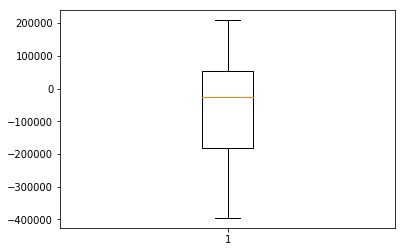

In [14]:
plt.boxplot(states["BUDGET_DEFICIT"])
plt.show()

4NCÜ SORU:

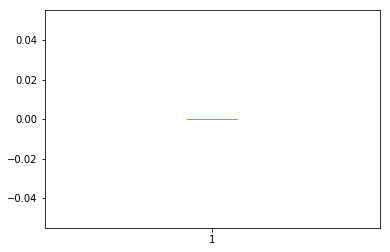

In [15]:
states["BUDGET_DEFICIT_CLRD"]=wins_TOTAL_REVENUE-wins_TOTAL_EXPENDITURE

plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.show()

Aykırı değerleri winsorize yöntemiyle düzeltmek burada istenen sonucu vermedi. Bu sefer log dönüşümü yaparak deneyelim.

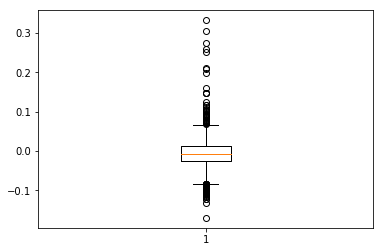

In [16]:
states["BUDGET_DEFICIT_CLRD"]=np.log(states["TOTAL_REVENUE"])-np.log(states["TOTAL_EXPENDITURE"])

plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.show()

Aykırı değerler mevcut. Bunları temizlerken, logaritması alınmış değerlerin ikinci kez logaritması alındığında sonuç vermeyecektir. Bu nedenle, tekrar winsorize işlemine dönelim.

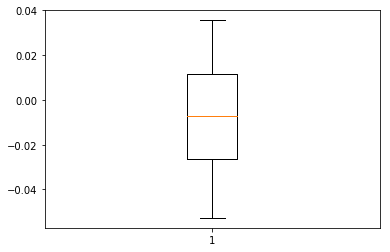

In [17]:
states["BUDGET_DEFICIT_CLRD"]=winsorize(states["BUDGET_DEFICIT_CLRD"], (0.1,0.1))

plt.boxplot(states["BUDGET_DEFICIT_CLRD"])
plt.show()

5NCİ SORU:

>3ncü sorudaki bütçe açığı için, değerleri hesaplayıp sadece bir kez dönüşüm işlemine tabi tuttuk.

>4ncü sorudaki bütçe açığı için, önce verileri dönüştürdük, sonra değişkeni hesapladık ve yine döşüm işlemine tabi tuttuk.

Önceki hesapladığımız değişkenin anlaşılması daha kolay ve ilk bakışta daha fazla fikir verir. Ayrıca, ikinci hesapladığımız değişken üzerinde daha fazla işlem yapmış olduğumuz için diğer verilerle arasındaki korelasyon zayıflamış olabilir. Verilerin üzerinde mümkün olduğunca az işlem yapmak daha sıhhatli sonuçlar verebilir.

6NCI SORU:

3ncü soruda yaptığımız işlem daha uygundur. Değerleri daha az sayıda işleme tabi tuttuk.